In [29]:
!pip install numpy
!pip install matplotlib

You should consider upgrading via the 'C:\python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\python310\python.exe -m pip install --upgrade pip' command.


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

define function

In [31]:
def Perceptron_mis_yx(y, x, w, n_epoch, eta):
    n_sample=len(y[:,0])//2
    x_c1 = x[0:n_sample,:]
    x_c2 = x[n_sample:n_sample*2, :]
    yx=y*x
    print('----- Perceptron_mis_yx() started -----\n');
    for e in range(n_epoch):
        yx_misclassified=np.zeros((1,3))#accumulate misclassfied yx
        wyx=np.dot(yx,w.T)
        err=np.where(wyx<0)
        
        yx_misclassified=yx_misclassified+np.sum(yx[err[0],np.array([[0],[1],[2]])],axis=1).T
        w = w + yx_misclassified
        n_err=len(err[0])
        print("err = ", n_err)
        tmpx= np.linspace(-5, 10, 100)
        tmpy = [(-num*w[0][1]/w[0][2]-w[0][0]/w[0][2]) for num in tmpx]
        plt.plot(tmpx, tmpy, color='black',linewidth=1)
        if n_err == 0:
            break
    return e+1

def Perceptron_l2(y, x, w, n_epoch, eta):
    n_sample=len(y[:,0])//2
    x_c1 = x[0:n_sample,:];
    x_c2 = x[n_sample:n_sample*2, :];
    
    print('----- Perceptron_l2() started -----\n');
    for e in range(n_epoch):
        wx=np.dot(x,w.T)
        diff = (y-wx)*x
        w = w + eta*np.sum(diff,axis=0)
        err1 = 1/2*np.sum((y - wx)**2,axis=0)
        wyx=y*wx
        err_tmp=np.where(wyx<0)
        err2=len(err_tmp[0])
        print('err(%d) = %f %d\n'%(e+1, err1, err2))
        tmpx= np.linspace(-5, 10, 100)
        tmpy = [(-num*w[0][1]/w[0][2]-w[0][0]/w[0][2]) for num in tmpx]
        plt.plot(tmpx, tmpy, color='black',linewidth=1)
        if err2 == 0:
            break
    return e+1

def function_SVM(y, x, w, epoch, eta) :
    n_sample=len(y[:,0])//2
    x_c1 = x[0:n_sample,:]
    x_c2 = x[n_sample:n_sample*2, :]
    yx=y*x
    lamda = 0.01
    
    for e in range(epoch):
        wyx=np.dot(yx,w.T)
        err_idx=np.where(wyx<1)
        err1=len(err_idx[0])
        err2=np.sum(wyx[err_idx[0],np.array([[0]])],axis=1)
        w = w + eta*(-2*lamda*w*(n_sample*2) + np.sum(yx[err_idx[0],np.array([[0],[1],[2]])],axis=1).T)
        w_nonbias=np.zeros((1,2))
        w_nonbias[0][0]=w[0][1]
        w_nonbias[0][1]=w[0][2]
        print(f'err(%d) = %f %f, w= %f %f %f, |w|=%f, |w23|=%f'%(e+1, err1, err2, w[0][0],w[0][1],w[0][2], np.sum(w**2,axis=1)[0], np.sum(w_nonbias**2,axis=1)[0]))
        tmpx= np.linspace(-5, 10, 100)
        tmpy = [(-num*w[0][1]/w[0][2]-w[0][0]/w[0][2]) for num in tmpx]
        plt.plot(tmpx, tmpy, color='black',linewidth=1)
    return e+1

def print_inputdata(x,y):
    plt.xlim([-5, 10])
    plt.ylim([-5, 10])
    plt.scatter(x[0:n_sample,1],x[0:n_sample,2], color='blue',marker='+')
    plt.scatter(x[n_sample:n_sample*2,1],x[n_sample:n_sample*2,2], color='red')

Practice 1: Perceptron starts

In [32]:
n_sample=20
x=np.ones((40,3))
x_c1= np.loadtxt("x_c1.txt",delimiter=',' or '\n')#txt file load
x_c2= np.loadtxt("x_c2.txt",delimiter=',' or '\n')#txt file load
x[0:20,1:3]=x_c1
x[20:40,1:3]=x_c2
y=np.ones((40,1))
y[0:20,0]*=-1

----- Perceptron_mis_yx() started -----

err =  23
err =  12
err =  12
err =  11
err =  10
err =  6
err =  3
err =  2
err =  1
err =  0


10

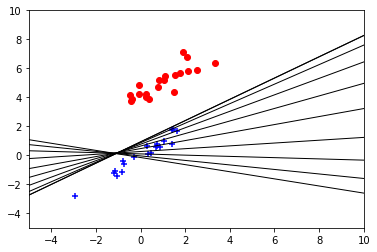

In [33]:
print_inputdata(x,y)
w=np.random.randn(1,3)
n_epoch=300
eta=0.001
Perceptron_mis_yx(y,x,w,n_epoch,eta)

----- Perceptron_l2() started -----

err(1) = 19.505446 16

err(2) = 6.932301 2

err(3) = 4.942179 0



3

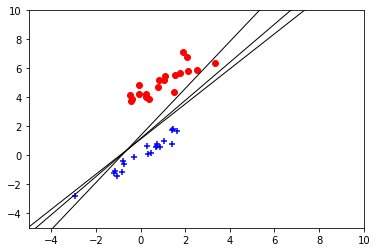

In [35]:
print_inputdata(x,y)
w=np.random.randn(1,3)
n_epoch=300
eta=0.001
Perceptron_l2(y,x,w,n_epoch,eta)

Practice 1: Perceptron ends,
Practice 2: SVM starts

err(1) = 20.000000 -50.315550, w= -2.077961 0.684234 -0.111635, |w|=4.798560, |w23|=0.480638
err(2) = 20.000000 -39.239044, w= -2.056299 0.703587 -0.010351, |w|=4.723506, |w23|=0.495142
err(3) = 21.000000 -27.245046, w= -2.035654 0.721295 0.089204, |w|=4.672110, |w23|=0.528224
err(4) = 24.000000 -13.982388, w= -2.018025 0.734724 0.184257, |w|=4.646196, |w23|=0.573771
err(5) = 23.000000 -6.090348, w= -2.001411 0.744792 0.272850, |w|=4.634807, |w23|=0.629163
err(6) = 20.000000 -2.335996, w= -1.989809 0.745167 0.334774, |w|=4.626689, |w23|=0.667347
err(7) = 18.000000 -0.622627, w= -1.980218 0.742240 0.385384, |w|=4.620703, |w23|=0.699441
err(8) = 18.000000 2.035804, w= -1.970633 0.739316 0.435953, |w|=4.620039, |w23|=0.736643
err(9) = 15.000000 1.390380, w= -1.964057 0.732787 0.471463, |w|=4.616774, |w23|=0.759255
err(10) = 14.000000 1.648105, w= -1.958486 0.725456 0.501728, |w|=4.613685, |w23|=0.778018
err(11) = 14.000000 2.647235, w= -1.952919 0.718131 0.531970, |w|=4.612596, |w23|=0.79

300

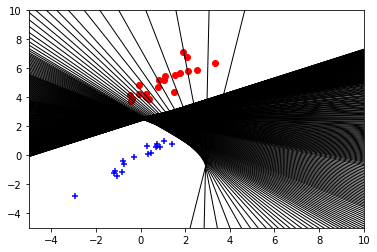

In [36]:
print_inputdata(x,y)
w=np.random.randn(1,3)
epoch=300
eta=0.001
function_SVM(y, x, w, epoch, eta)

Practice 2: SVM ends